# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [61]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


In [62]:
NUM_POINTS = 1500    # DEBUG 1500
UNITS = "metric"
BASE_URL = f"https://api.openweathermap.org/data/2.5/weather?APPID={weather_api_key}&units={UNITS}"


### Generate the Cities List by Using the `citipy` Library

In [63]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=NUM_POINTS)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=NUM_POINTS)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [64]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{BASE_URL}&q={city.replace(' ','+')}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Send a get request to the API endpoint
        response = requests.get(city_url)
        
        # Parse the JSON and retrieve data
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except KeyError:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kazalinsk
City not found. Skipping...
Processing Record 2 of Set 1 | nuuk
Processing Record 3 of Set 1 | rio grande
Processing Record 4 of Set 1 | palapag
Processing Record 5 of Set 1 | ambon
Processing Record 6 of Set 1 | bethel
Processing Record 7 of Set 1 | le port
Processing Record 8 of Set 1 | hamilton
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | mitsamiouli
Processing Record 12 of Set 1 | pisco
Processing Record 13 of Set 1 | anadyr
Processing Record 14 of Set 1 | vuktyl
Processing Record 15 of Set 1 | cabo san lucas
Processing Record 16 of Set 1 | sitka
Processing Record 17 of Set 1 | hithadhoo
Processing Record 18 of Set 1 | shakiso
Processing Record 19 of Set 1 | tafuna
Processing Record 20 of Set 1 | tiksi
Processing Record 21 of Set 1 | petropavlovsk-kamchatsky
Processing Record 22 of Set 1 | arkhangel'sk
Processing

Processing Record 41 of Set 4 | san patricio
Processing Record 42 of Set 4 | fengcheng
Processing Record 43 of Set 4 | dudinka
Processing Record 44 of Set 4 | ho
City not found. Skipping...
Processing Record 45 of Set 4 | vila franca do campo
Processing Record 46 of Set 4 | shengli
Processing Record 47 of Set 4 | bamboo flat
Processing Record 48 of Set 4 | purpe
Processing Record 49 of Set 4 | chardara
Processing Record 0 of Set 5 | sao gabriel
Processing Record 1 of Set 5 | peniche
Processing Record 2 of Set 5 | vodice
Processing Record 3 of Set 5 | menongue
Processing Record 4 of Set 5 | dunedin
Processing Record 5 of Set 5 | 'ohonua
City not found. Skipping...
Processing Record 6 of Set 5 | olonkinbyen
Processing Record 7 of Set 5 | teknaf
Processing Record 8 of Set 5 | chinchilla
Processing Record 9 of Set 5 | nar'yan-mar
Processing Record 10 of Set 5 | nabire
Processing Record 11 of Set 5 | nizao
Processing Record 12 of Set 5 | thunder bay
Processing Record 13 of Set 5 | huarmey
P

Processing Record 29 of Set 8 | okhotsk
Processing Record 30 of Set 8 | walvis bay
Processing Record 31 of Set 8 | leua
Processing Record 32 of Set 8 | oranjemund
Processing Record 33 of Set 8 | shushtar
Processing Record 34 of Set 8 | mejit
Processing Record 35 of Set 8 | brasilia
Processing Record 36 of Set 8 | kirakira
Processing Record 37 of Set 8 | regeneracao
Processing Record 38 of Set 8 | bhimunipatnam
Processing Record 39 of Set 8 | callao
Processing Record 40 of Set 8 | teruel
Processing Record 41 of Set 8 | stuttgart
Processing Record 42 of Set 8 | fort bragg
Processing Record 43 of Set 8 | east london
Processing Record 44 of Set 8 | ghimes-faget
Processing Record 45 of Set 8 | kayangel
Processing Record 46 of Set 8 | mikhaylovka
Processing Record 47 of Set 8 | ampanihy
Processing Record 48 of Set 8 | acapulco de juarez
Processing Record 49 of Set 8 | kyaikkami
Processing Record 0 of Set 9 | yuanping
Processing Record 1 of Set 9 | port saint john's
Processing Record 2 of Set

Processing Record 18 of Set 12 | carnarvon
Processing Record 19 of Set 12 | bharatpur
Processing Record 20 of Set 12 | kachug
Processing Record 21 of Set 12 | reuleuet
Processing Record 22 of Set 12 | monte alegre de minas
Processing Record 23 of Set 12 | fale old settlement
Processing Record 24 of Set 12 | korla
Processing Record 25 of Set 12 | elk city
Processing Record 26 of Set 12 | bengkulu
Processing Record 27 of Set 12 | mangrol
Processing Record 28 of Set 12 | yueyang
Processing Record 29 of Set 12 | mhamid
Processing Record 30 of Set 12 | pahokee
Processing Record 31 of Set 12 | sandnessjoen
Processing Record 32 of Set 12 | batyrevo
Processing Record 33 of Set 12 | bandarbeyla
Processing Record 34 of Set 12 | poronaysk
Processing Record 35 of Set 12 | tieli
Processing Record 36 of Set 12 | orcopampa
Processing Record 37 of Set 12 | gomez farias
Processing Record 38 of Set 12 | mossel bay
Processing Record 39 of Set 12 | el porvenir
Processing Record 40 of Set 12 | kalispell
Pr

In [65]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [66]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nuuk,64.1835,-51.7216,-8.66,67,100,7.20,GL,1706670098
1,rio grande,-32.0350,-52.0986,20.81,88,15,2.79,BR,1706670101
2,palapag,12.5458,125.1147,26.68,77,97,6.71,PH,1706670104
3,ambon,-3.6954,128.1814,32.08,62,40,3.09,ID,1706670108
4,bethel,41.3712,-73.4140,1.31,77,100,2.50,US,1706670111


In [67]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [68]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nuuk,64.1835,-51.7216,-8.66,67,100,7.20,GL,1706670098
1,rio grande,-32.0350,-52.0986,20.81,88,15,2.79,BR,1706670101
2,palapag,12.5458,125.1147,26.68,77,97,6.71,PH,1706670104
3,ambon,-3.6954,128.1814,32.08,62,40,3.09,ID,1706670108
4,bethel,41.3712,-73.4140,1.31,77,100,2.50,US,1706670111


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

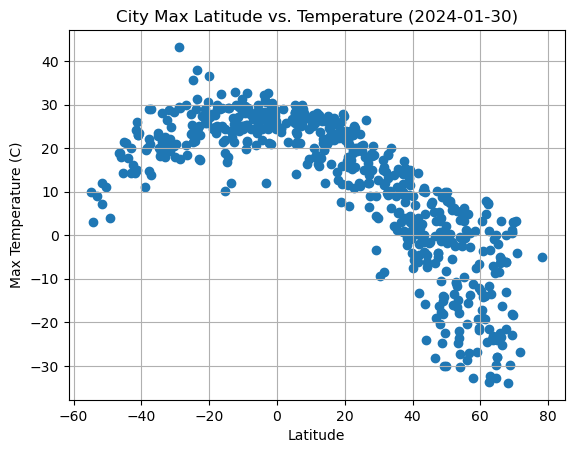

In [69]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])


# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2024-01-30)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

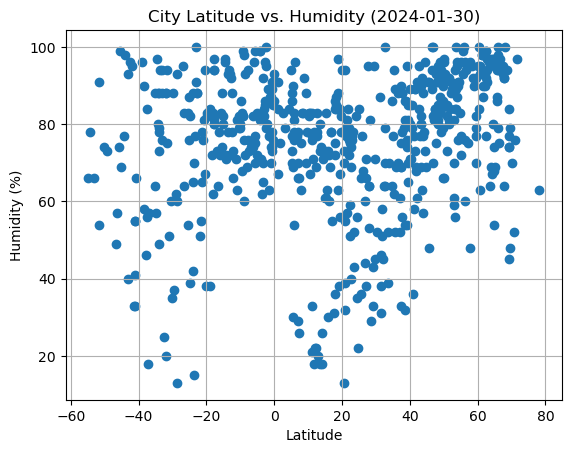

In [70]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-01-30)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

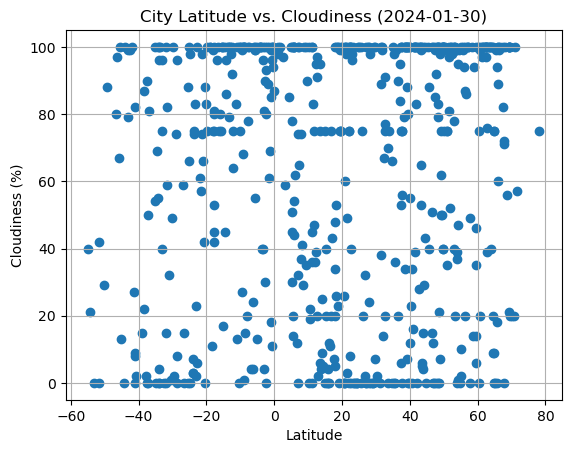

In [71]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-01-30)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

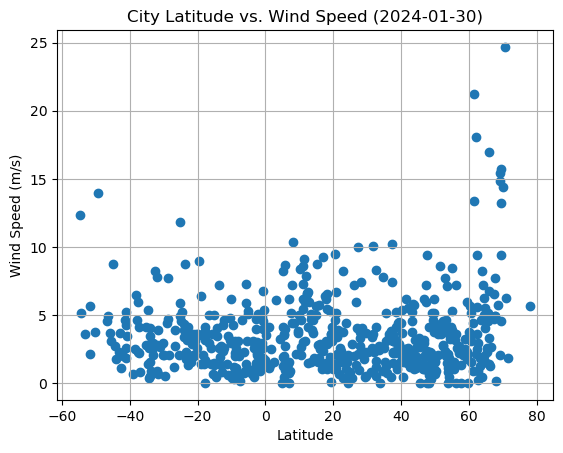

In [72]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])
# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-01-30)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [73]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x, y, x_label, y_label, title, save_file):
    # Perform linear regression
    slope, intercept, rvalue, pvalue, stderr = linregress(x, y)

    # Create scatter plot
    plt.scatter(x, y)

    # Create regression line
    regression_line = slope * x + intercept
    plt.plot(x, regression_line, color='red')

    # Incorporate the other graph properties
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Add trendline formula and R-value
    formula = f"y = {slope:.2f}x + {intercept:.2f}"
    text_box_props = dict(boxstyle='round', facecolor='white', edgecolor='gray', alpha=0.5)
    plt.text(x.min(), y.min(), formula, color='red', bbox=text_box_props, ha='left')

    # Save the figure
    plt.savefig(save_file)
    
    # Print the R-value
    print(f"R-value is: {rvalue:.2f}")
    
    # Show plot
    plt.show()

In [74]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nuuk,64.1835,-51.7216,-8.66,67,100,7.20,GL,1706670098
2,palapag,12.5458,125.1147,26.68,77,97,6.71,PH,1706670104
4,bethel,41.3712,-73.4140,1.31,77,100,2.50,US,1706670111
6,hamilton,39.1834,-84.5333,3.02,95,100,2.68,US,1706670117
8,yellowknife,62.4560,-114.3525,-11.71,92,100,3.60,CA,1706670085


In [75]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,rio grande,-32.0350,-52.0986,20.81,88,15,2.79,BR,1706670101
3,ambon,-3.6954,128.1814,32.08,62,40,3.09,ID,1706670108
5,le port,-20.9373,55.2919,26.98,76,66,1.97,RE,1706670114
7,hermanus,-34.4187,19.2345,19.89,80,100,2.58,ZA,1706669954
9,mitsamiouli,-11.3847,43.2844,27.04,71,83,1.41,KM,1706670126


###  Temperature vs. Latitude Linear Regression Plot

R-value is: -0.84


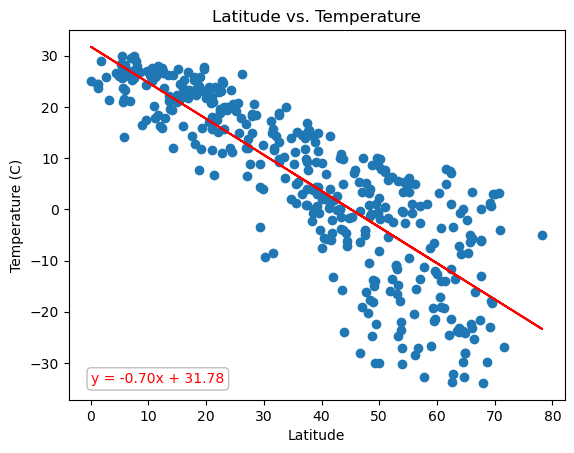

In [76]:
# Linear regression on Northern Hemisphere
create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Temperature (C)", "Latitude vs. Temperature", "output_data/Fig5.png")



R-value is: 0.54


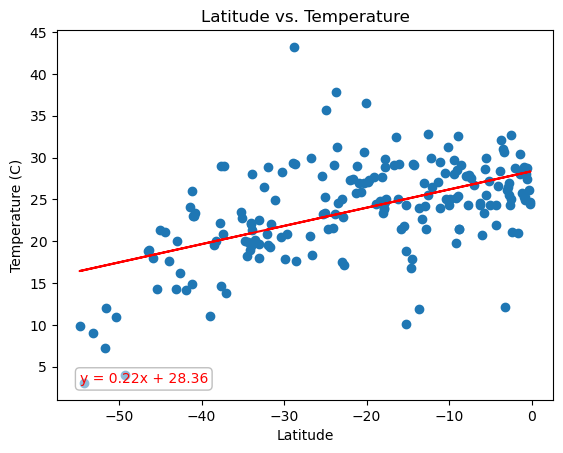

In [77]:
# Linear regression on Southern Hemisphere
create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Temperature (C)", "Latitude vs. Temperature", "output_data/Fig6.png")


**Discussion about the linear relationship:** In the Northern Hemisphere, temperature has a negative linear relationship with increasing latitude. In the Southern Hemisphere, temperature has a positive linear relationship with increasing latitude

### Humidity vs. Latitude Linear Regression Plot

R-value is: 0.37


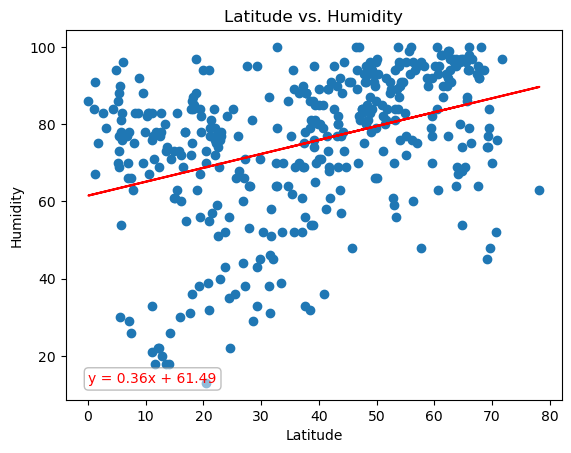

In [78]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity", "Latitude vs. Humidity", "output_data/Fig7.png")


R-value is: 0.29


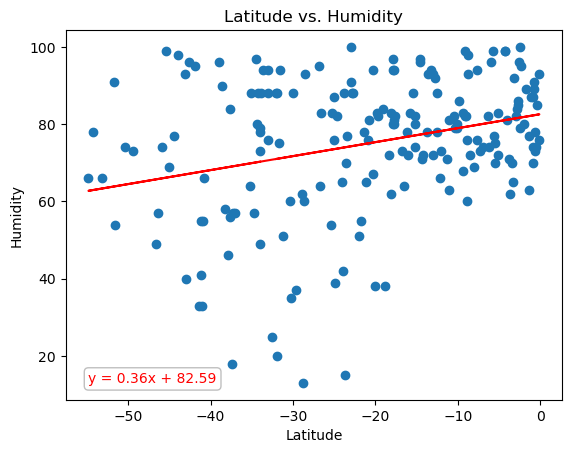

In [79]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity", "Latitude vs. Humidity", "output_data/Fig8.png")


**Discussion about the linear relationship:** There is a positive relationship between increasing latitude and increasing humidity in both hemispheres

### Cloudiness vs. Latitude Linear Regression Plot

R-value is: 0.15


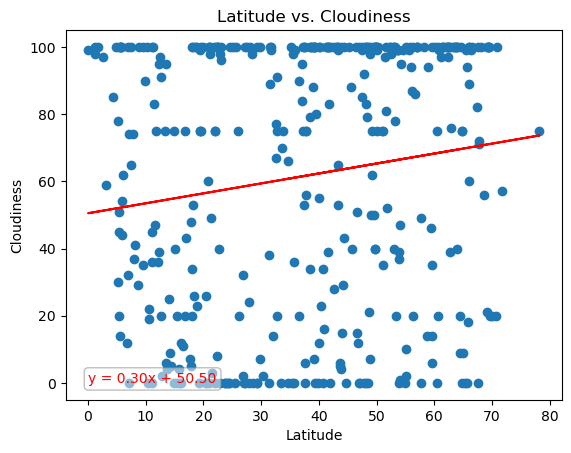

In [80]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", "Latitude vs. Cloudiness", "output_data/Fig9.png")


R-value is: 0.30


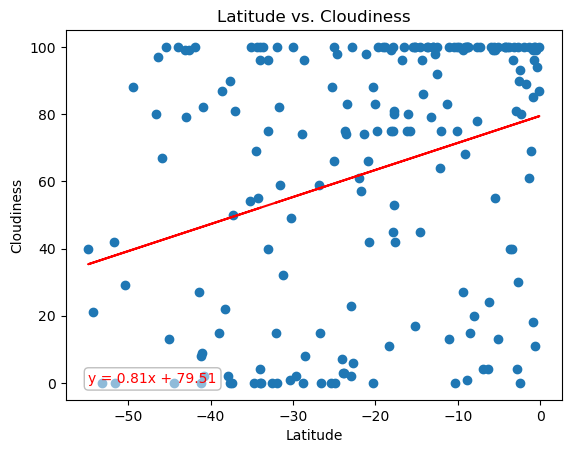

In [81]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", "Latitude vs. Cloudiness", "output_data/Fig10.png")


**Discussion about the linear relationship:** There is a positive relationship between latitude and cloudiness in both hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

R-value is: 0.13


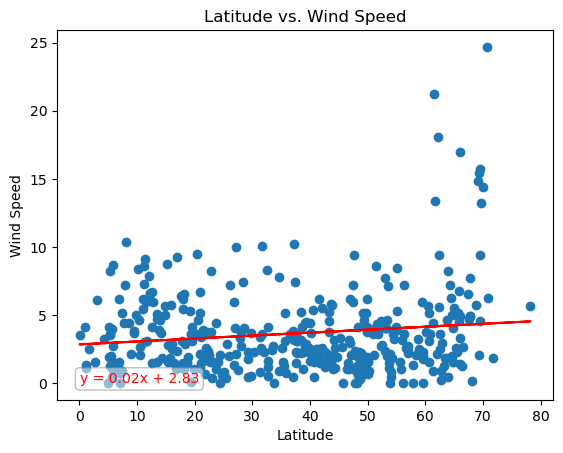

In [82]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", "Latitude vs. Wind Speed", "output_data/Fig9.png")


R-value is: -0.25


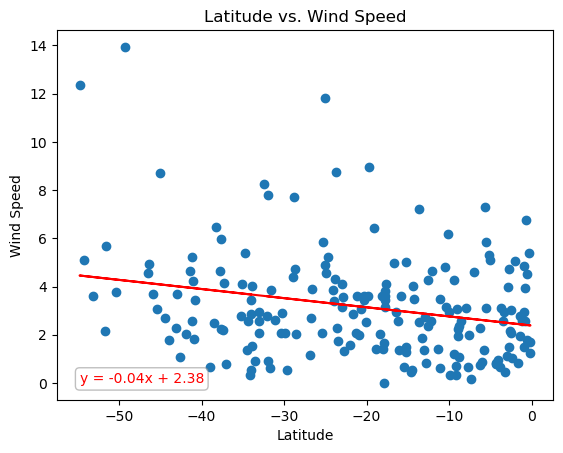

In [83]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", "Latitude vs. Wind Speed", "output_data/Fig9.png")


**Discussion about the linear relationship:** Although small, there is a positive relationship between increasing latitudes in the northern hemisphere and wind speed, and a negative relationship between them in the southern hemisphere.